# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Rossman operates over 3000 drug stores in 7 Europian countries. There are two datasets given. The ultimate goal is to find insights from the data and fit machine learning model to pridict the sales. There are two dataset in which one dataset has information on storeid,sales,customers,promotions and holidays and the other dataset has store,assortment type, store type, promotion intervals and some information on competition. In this Regression project I will first go through the data like understanding the data, altering the data like altering null values and deleting duplicate values then, I will do data wrangling like merging, changing formats, label encoding and making the data ready fore proper visualiuzation. Then I will visualize the data to find the insights from the given data and get best possible information by visualization. Then I will perform some hypothesis testing and finally i will preproces the data and do feature engineering acording to the diffrent models and then fit a machine learning model and then I will check the accuracy of the model by Rsquare and MSE(mean squared Error). I will try to fit diffrent models to evaluate which model performs better with highest R2 score and least MSE

# **GitHub Link -**

https://github.com/umerulla

# **Problem Statement**


This is an Regression project where there are two dataset named as rossman store data and store data .

 The rossman is an business that has variuos store in diffrent continents. Rossman stores data has store id, Date, Sales, Holiday information, Open and promotion data,
The store data has store id, store type, its competition information and promotion information.

 With these datasets we will merge them find and duplicates and null values, find Insights from the data, make the data ready to fit diffrent machine learning models and the ultimate goal is to fit a best possible model to predict the sales

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Dataset Loading

In [2]:
# Load Dataset
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
rossman_store_data = pd.read_csv('/content/drive/MyDrive/Regression project/Copy of Rossmann Stores Data.csv')
store_data = pd.read_csv('/content/drive/MyDrive/Regression project/Copy of store.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
# Dataset First Look
rossman_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rossman_store_data.shape

(1017209, 9)

In [6]:
store_data.shape

(1115, 10)

### Dataset Information

In [7]:
# Dataset Info
rossman_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('The duplicate values in Rossman_store_data is',len(rossman_store_data[rossman_store_data.duplicated()]))

The duplicate values in Rossman_store_data is 0


In [10]:
# Dataset Duplicate Value Count
print('The duplicate values in Store_data is',len(store_data[store_data.duplicated()]))

The duplicate values in Store_data is 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
rossman_store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 1.0, 'Total null values in each column')

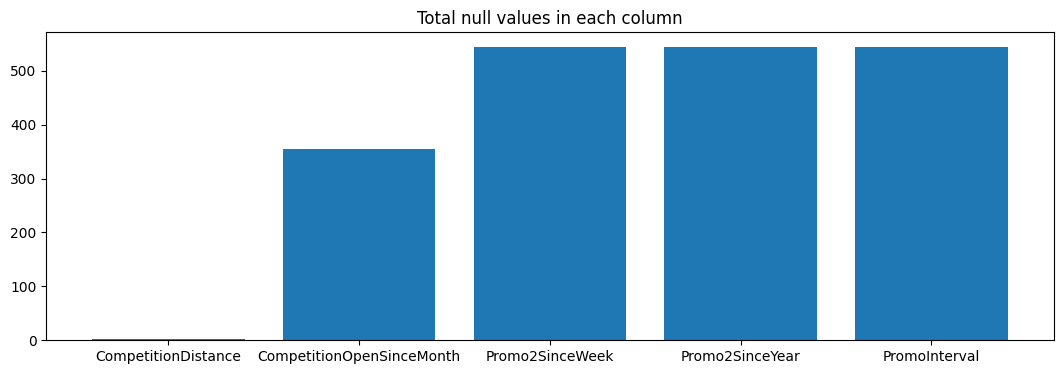

In [13]:
# Visualizing the missing values
null_values= store_data[['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].isnull().sum()
null_values

fig = plt.figure(figsize = (13,4))
plt.bar(null_values.index, null_values.values)
plt.title('Total null values in each column')


### What did you know about your dataset?

There are two datasets that has over 1017209 rows in rossman store data and 1115 rows in store data

In rossman store data we have information on the store id, the total sales with all the dates stating the holidays and with promotion offers or not

In store data we have information on store types, Assortment and information on its competition and promotional offers

Rossman store data has no duplicate and null values but in store data there are some null values which we will be filling with appropriate data

There are categorical features in both the datasets which should be replaced with numerical values in order to get best machine learning model


## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
# Dataset Columns
rossman_store_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
# Dataset Describe
rossman_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

**Rossman Store Data**

* Store - Unique store id
* DayOfWeek	- particular day of week
* Date- Date of sale made
* Sales- Sales for the day
* Customer- The total number customers for that day
* Open- The store was open or closed (0 = Closed, 1 = Open)
* Promo- Was there any promotion on that day
* StateHoliday- Public Holiday
* SchoolHoliday- School
* StoreType- States the type of store
* Assortment- Type of assortment level
* CompetitionDistance- The distance from its competition
* CompetitionOpenSinceMonth- States the month on which its competion started his store
* CompetitionOpenSinceYear- States the year from which its competition started his store
* Promo2- Store running consecutive promotion or not
* Promo2SinceWeek- the number of weeks the store is participating in the consecutive promotion
* Promo2SinceYear- states the year from which the store is participating in the consecutive promotion
* PromoInterval- States the intervals of the promotion

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print(rossman_store_data.apply(lambda x : x.unique()))

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


In [19]:
print(store_data.apply(lambda x : x.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

##### Firstly we will fill the null values present in store_data

In [20]:
# Write your code to make your dataset analysis ready.

In [21]:
# The competition distance cannot be empty so we can fill with mean or median. we will apply median here because median values doesn't get affected by the outliers present in our data
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

# the rest columns will be filled by 0 because the column states that there can be no promotion offers and competition

store_data['CompetitionOpenSinceMonth'].fillna(0 , inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(0 , inplace = True)
store_data['Promo2SinceWeek'].fillna(0 , inplace = True)
store_data['Promo2SinceYear'].fillna(0 , inplace = True)
store_data['PromoInterval'].fillna(0 , inplace = True)

print('After replacing null values the null values in store data are', store_data.isnull().sum())


After replacing null values the null values in store data are Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


#### Merging both the Datasets

In [22]:
#  We will do left join as the on rossman_store_data and store_data because the data in store_data is present in rossman_store_data with Store
new_store_data = pd.merge(rossman_store_data, store_data, on='Store', how='left')
new_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [23]:
# Checking if the new dataset has any duplicate values
print('Total duplicate values in this dataset are:',len(new_store_data[new_store_data.duplicated()]))

Total duplicate values in this dataset are: 0


In [24]:
#Checking if the new dataset has any null values
new_store_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [25]:
print(new_store_data.apply(lambda x : x.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                                [5, 4, 3, 2, 1, 7, 6]
Date                         [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales                        [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers                    [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                                    [1, 0]
Promo                                                                   [1, 0]
StateHoliday                                                   [0, a, b, c, 0]
SchoolHoliday                                                           [1, 0]
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 

### Label Encoding

In [26]:
# Label Encoding
label_encoder = {'StoreType' : {'a':0 ,'b':1,'c':2 ,'d' :3} , 'Assortment':{'a':0 ,'b':1,'c':2}, 'StateHoliday' : {'0' :0 ,'a':1,'b':2 ,'c':3}}
new_store_data = new_store_data.replace(label_encoder)

In [27]:
# Converting float values to integers
new_store_data['CompetitionDistance'] = new_store_data['CompetitionDistance'].astype(int)
new_store_data['CompetitionOpenSinceMonth'] = new_store_data['CompetitionOpenSinceMonth'].astype(int)
new_store_data['CompetitionOpenSinceYear'] = new_store_data['CompetitionOpenSinceYear'].astype(int)
new_store_data['Promo2SinceWeek'] = new_store_data['Promo2SinceWeek'].astype(int)
new_store_data['Promo2SinceYear'] = new_store_data['Promo2SinceYear'].astype(int)

In [28]:
# Converting the data to appropriate format
new_store_data['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(new_store_data['Date']).month

### Changing the format of DateTime


In [29]:
new_store_data['Date']=pd.to_datetime(new_store_data['Date'])
new_store_data['Year'] = new_store_data['Date'].apply(lambda x: x.year)
new_store_data['Month'] = new_store_data['Date'].apply(lambda x: x.month)
new_store_data['Day'] = new_store_data['Date'].apply(lambda x: x.day)

In [30]:
# There is some error in date and there is already diffrent column created seprately for date,month and year so we will drop date column
new_store_data.drop(['Date'], axis = 1 , inplace = True)

In [31]:
# Checking all the unique values so that for any Categorical column it can be converted to numerical column by Label Encoding

print(new_store_data.apply(lambda x : x.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                                [5, 4, 3, 2, 1, 7, 6]
Sales                        [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers                    [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                                    [1, 0]
Promo                                                                   [1, 0]
StateHoliday                                                      [0, 1, 2, 3]
SchoolHoliday                                                           [1, 0]
StoreType                                                         [2, 0, 3, 1]
Assortment                                                           [0, 2, 1]
CompetitionDistance          [1270, 570, 14130, 620, 29910, 310, 24000, 752...
CompetitionOpenSinceMonth              [7, 6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8]
CompetitionOpenSinceYear     [2008, 2007, 2006, 2009

### What all manipulations have you done and insights you found?

* Firstly I checked the duplicated values inj both the dataset and there were no duplicates found
* Then I checked null values in both dataset and in store data file there were some null values and I filled with values 0 because non null values were all numerical values
* Then I merged the dataset and I performed left join on rossman dataset on "STORE" Column
* Once again i checked the duplicate values in the merged dataset and there were no duplicates found
* I checked for null values once again in the merged dataset and obviously there were no n ull value found
* I checked the unique values of all features and there were some features that has datra like ( a,b,c,d) so i did label encoding and the values like (a became 0, b became 1, c became 3, and this continued till all the unique values were filled. There were at most 4 variables till d so label encoding was done)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Bar plot)

###Distribution of customers according to the day of the week

Text(0.5, 1.0, 'Total number of customers visiting according to the days of the week')

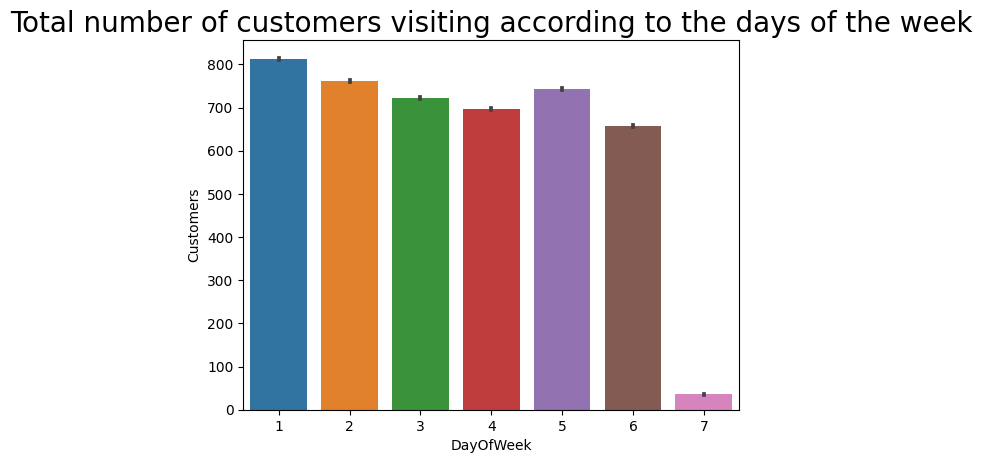

In [82]:
# Chart - 1 visualization code
sns.barplot(new_store_data, x = 'DayOfWeek', y = 'Customers')
plt.title('Total number of customers visiting according to the days of the week', fontsize = (20))

##### 1. Why did you pick the specific chart?

Bar plot helps us to compare the number of customers according to the day of week

##### 2. What is/are the insight(s) found from the chart?

As we can see the highest number of customers arrive on monday and least people visit on sunday

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are least number of customers on Sunday so the stores can put some offers and discount especially on sundays to increase the customers count

#### Chart - 2 (Point Plot)

### Distribution of sales by competition open since year

Text(0.5, 1.0, 'Total sales according to the competition open since year')

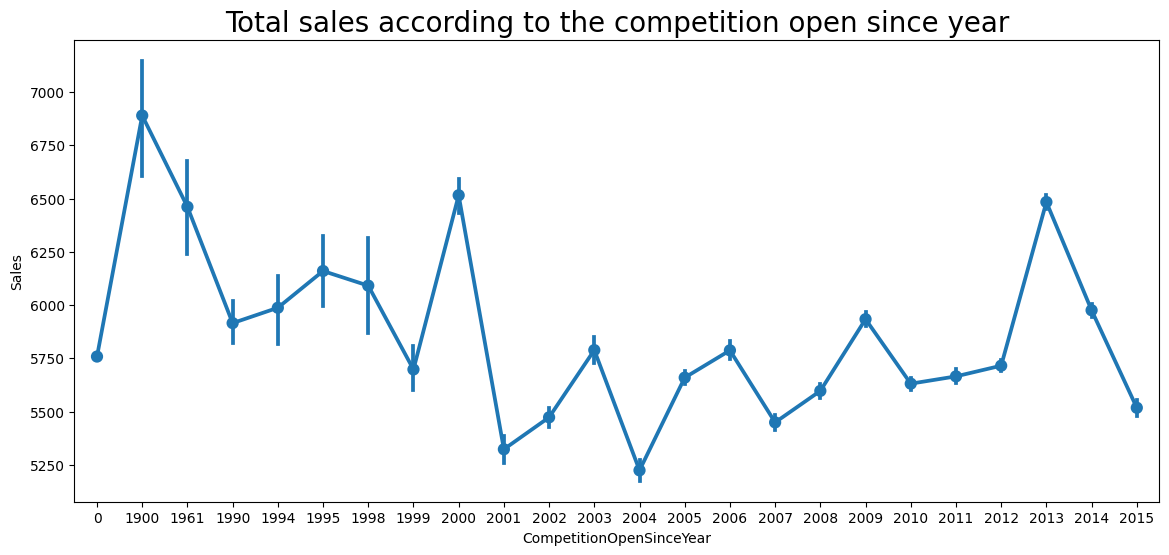

In [83]:
# Chart - 2 visualization code
plt.figure(figsize = (14,6))
sns.pointplot(new_store_data, x = 'CompetitionOpenSinceYear' , y = 'Sales')
plt.title ('Total sales according to the competition open since year', fontsize = (20))

##### 1. Why did you pick the specific chart?

point plot helps to understand the trend of sales here

##### 2. What is/are the insight(s) found from the chart?

At the begining the salels were high as there were very few competition and after 2000 the sales decreased as the copetition increased

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we cann see the sales are being reduced as the number of competitors increased. The stores should create their brand value to maintain its sales and customers

#### Chart - 3 (Point Plot)

### Distribution of sales by competition open since month

Text(0.5, 1.0, 'Total sales according to the competition open since month')

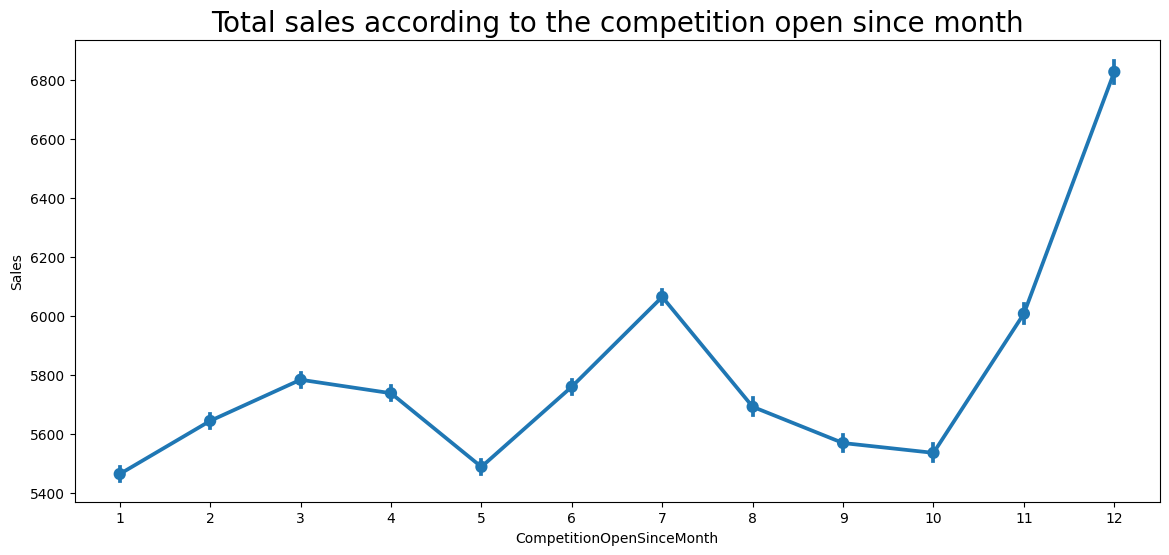

In [84]:
# Chart - 3 visualization code
plt.figure(figsize = (14,6))
sns.pointplot(new_store_data, x = 'CompetitionOpenSinceMonth' , y = 'Sales')
plt.title ('Total sales according to the competition open since month', fontsize = (20))

##### 1. Why did you pick the specific chart?

point plot helps to understand the trend of sales here

##### 2. What is/are the insight(s) found from the chart?

The sales are at peak from November to December

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The sales decreases especially from January till October.

#### Chart - 4 (Bar plot)

###The distribution of sales according to the store type

Text(0.5, 1.0, 'Total sales according to store type')

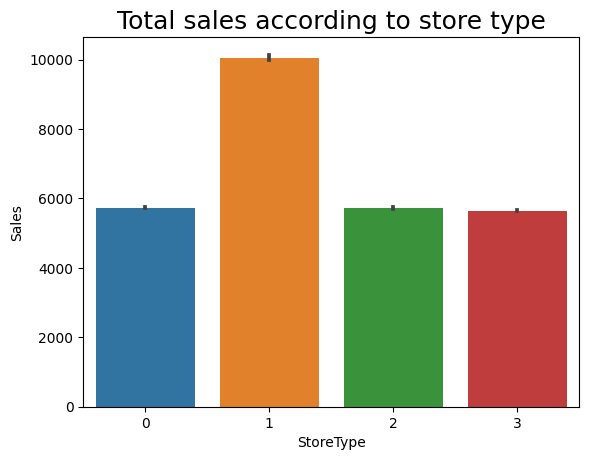

In [85]:
# Chart - 4 visualization code
sns.barplot(new_store_data, x = 'StoreType', y = 'Sales')
plt.title('Total sales according to store type', fontsize = (18))

##### 1. Why did you pick the specific chart?

Bar plot helps to compare sales of every store type

##### 2. What is/are the insight(s) found from the chart?

Store type 2 has highest Sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Only the store type 2 has highest sales and rest all types don't have such huge sales compared to store 2, Store 1,3,4 should be focused more for improving sales

#### Chart - 5 (Pie Chart)

###Pie plot showing the the the sales when the store runs promotional offers and the sales when there are no promotional offers

Text(0.5, 1.0, 'Total sales when the store has promotion or not')

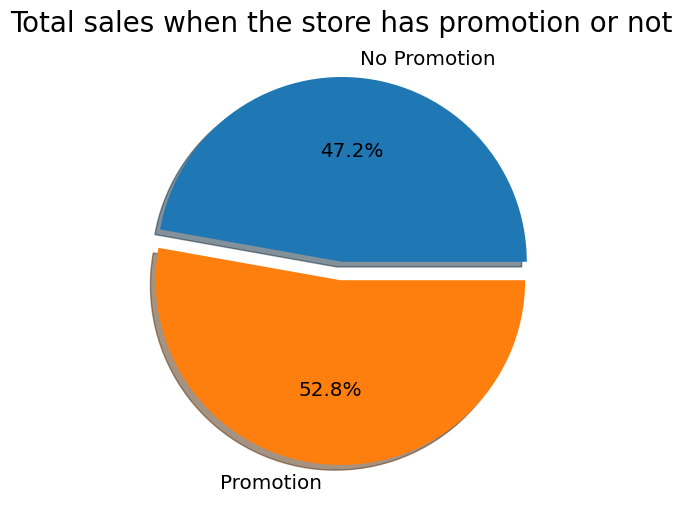

In [86]:
# Chart - 5 visualization code
# Creating a dataframe with total sales when there is promotion and when there is no promotions
diag = new_store_data.groupby(['Promo'])['Sales'].sum().reset_index().rename(columns = {'Sales':'Total Sales'})
fig, ax = plt.subplots(figsize=(6,6))
labels = ['No Promotion' ,'Promotion']
ax.pie(diag['Total Sales'], labels = labels,autopct = '%1.1f%%', textprops={'size': 'x-large'},explode =[0.05,0.05],shadow= True)
plt.title('Total sales when the store has promotion or not',fontsize = 20)

##### 1. Why did you pick the specific chart?

Pie plot helps to compare the v ariables as a whole

##### 2. What is/are the insight(s) found from the chart?

The sales are more when the store runs promotional offers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The sales are not not affecting much when the store runs promotional offers. Maybe the promotional offers are not reachinng its targeted customers.

#### Chart - 6 (Bar plot)

### Bar plot showing the Distribution of sales acording to Assortment

Text(0.5, 1.0, 'Distribution of sales according to the Assortment')

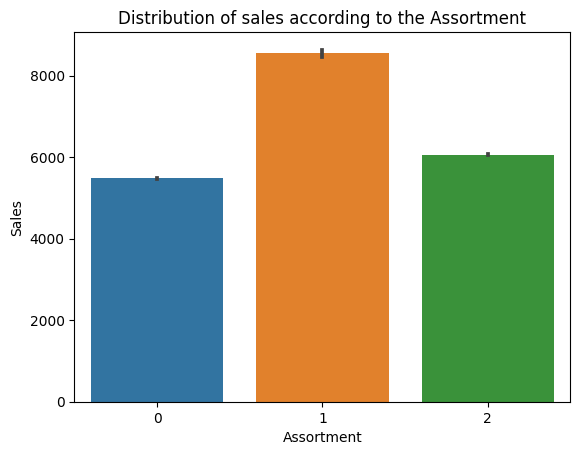

In [87]:
# Chart - 6 visualization code
sns.barplot(new_store_data, x = 'Assortment', y = 'Sales')
plt.title('Distribution of sales according to the Assortment')

##### 1. Why did you pick the specific chart?

Bar plot helps to compare various variables

##### 2. What is/are the insight(s) found from the chart?

the sales are high when the assortment is at 1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the sales are high on Assortment at 1 and the sales are low if the assortment is at 0 ands even the assortment is at 2

#### Chart - 7

### Pie plot to show the distribution of diffrent store types

Text(0.5, 1.0, 'Toal number of stores according to store types')

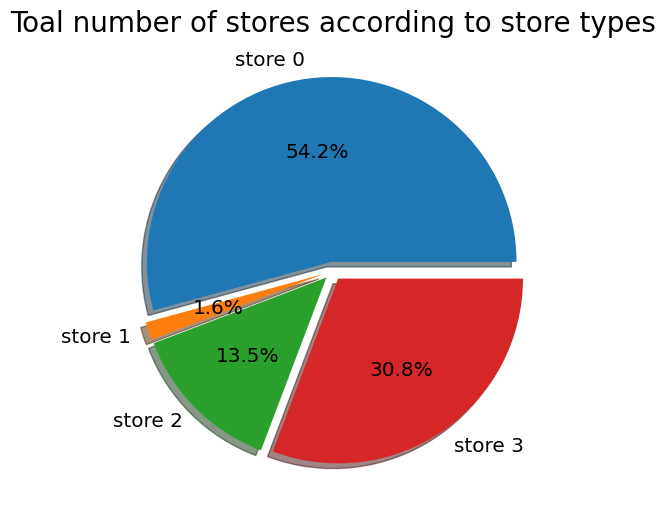

In [91]:
# Chart - 7 visualization code
newdf = new_store_data['StoreType'].value_counts().reset_index().rename(columns = {'index' : 'storetype', 'StoreType': 'total_stores'}).sort_values('storetype', ascending = True)

fig, ax = plt.subplots(figsize=(6,6))
labels = ['store 0','store 1','store 2','store 3']
ax.pie(newdf['total_stores'], labels = labels,autopct = '%1.1f%%', textprops={'size': 'x-large'},explode =[0.05,0.05, 0.05,0.05],shadow= True)
plt.title('Toal number of stores according to store types',fontsize = 20)

##### 1. Why did you pick the specific chart?

Pie plot helps to compare diffrent level at once

##### 2. What is/are the insight(s) found from the chart?

There are lots of store of store type 0 (around 52%)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are very few around 1.6% of stores of store type 1. There should be plan to be made to increase the number of store with store type

#### Chart - 8 (Scatterplot)

### Realtionship between sales and Customers

Text(0.5, 1.0, ' Realtionship between Sales and Customers')

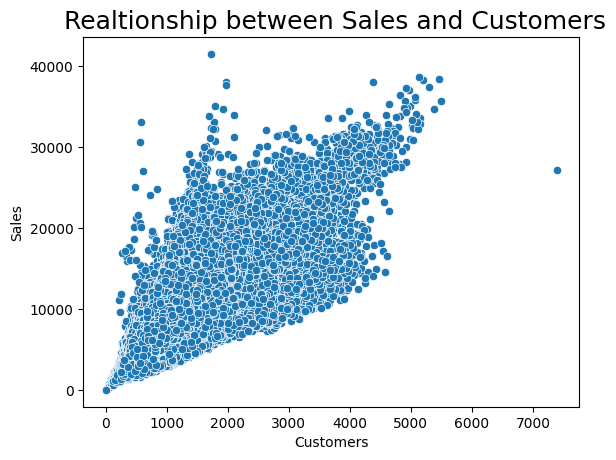

In [89]:
# Chart - 8 visualization code
sns.scatterplot(x = 'Customers' , y = 'Sales', data = new_store_data )
plt.title(' Realtionship between Sales and Customers', fontsize = 18)

##### 1. Why did you pick the specific chart?

Scatter plot helps to the relationship between the two variables

##### 2. What is/are the insight(s) found from the chart?

The scatter plot says that the sales are high when the customers incraese

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By seeing the scatter plot we can see few points shows high sales with even the customers are not much this means the rule of pareto principle is applicable

#### Chart - 9 (Heatmap)

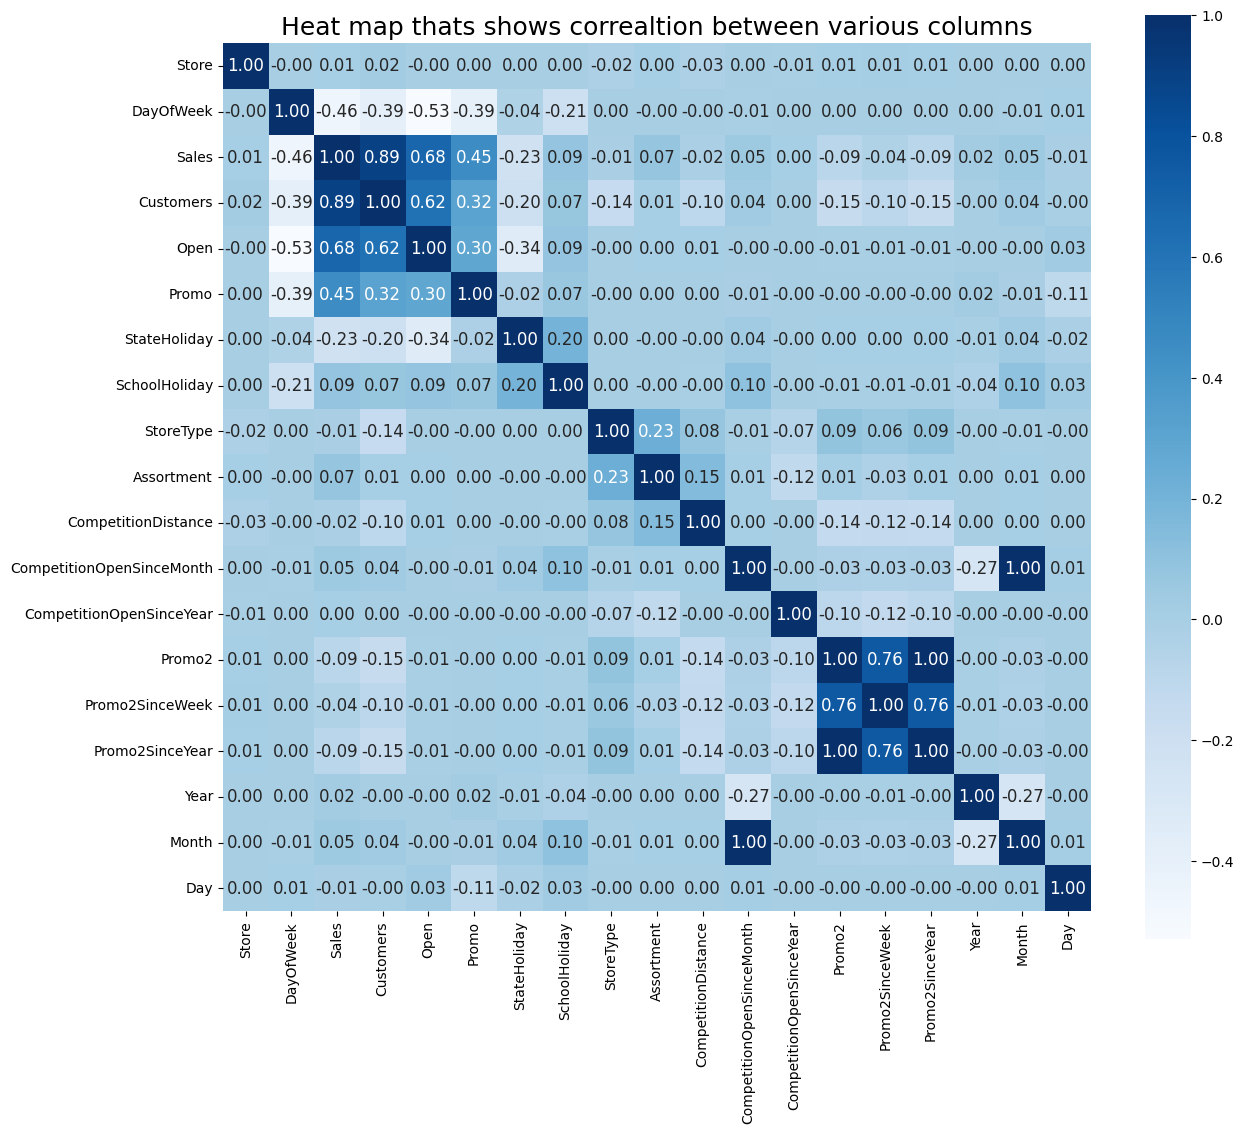

In [92]:
# Chart - 9 visualization code
correlation = new_store_data.corr()
fig, ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation, annot = True, fmt='.2f', annot_kws={'size': 12},  vmax=1, square=True, cmap="Blues")
ax.set_title('Heat map thats shows correaltion between various columns', fontsize = (18))
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap helps us to know the correaltion between various variable

##### 2. What is/are the insight(s) found from the chart?

* There is negative correaltion of sales on day of the week this means sales dont affect much on the days of week
* sales with customers has the highest correaltion and that is obvious because the more the customers the more the sales
* The customers and promo is slightly positive correlated that means the number of customers increase as there is promotions

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [51]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [52]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [53]:
# Expand Contraction

#### 2. Lower Casing

In [54]:
# Lower Casing

#### 3. Removing Punctuations

In [55]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [56]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [57]:
# Remove Stopwords

In [58]:
# Remove White spaces

#### 6. Rephrase Text

In [59]:
# Rephrase Text

#### 7. Tokenization

In [60]:
# Tokenization

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [64]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [65]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Transform Your data

### 6. Data Scaling

In [67]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [68]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [69]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [70]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [71]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [76]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [79]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [80]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***